# Dimensionality Reduction on Wine Dataset

## Introduction

This notebook provides an overview of applying various dimensionality reduction techniques to the wine quality dataset. Dimensionality reduction is crucial in data analysis for reducing the number of input variables, improving model performance, and aiding in data visualization.

We will cover the following techniques:
- PCA (Principal Component Analysis)
- SVD (Singular Value Decomposition)
- MDS (Multidimensional Scaling)
- LLE (Local Linear Embedding)
- UMAP (Uniform Manifold Approximation and Projection)
- t-SNE (t-Distributed Stochastic Neighbor Embedding)

## Dataset Overview

We start by importing the dataset and performing basic exploratory data analysis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/winequalityN.csv'
wine_data = pd.read_csv(file_path)

# Basic data exploration
data_shape = wine_data.shape
data_types = wine_data.dtypes
missing_values = wine_data.isnull().sum()
basic_statistics = wine_data.describe()


In [3]:
(data_shape,data_types,missing_values,basic_statistics)

((6497, 13),
 type                     object
 fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object,
 type                     0
 fixed acidity           10
 volatile acidity         8
 citric acid              3
 residual sugar           2
 chlorides                2
 free sulfur dioxide      0
 total sulfur dioxide     0
 density                  0
 pH                       9
 sulphates                4
 alcohol                  0
 quality                  0
 dtype: int64,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    6487.000000       6489.000000  6494.000000     6495.000000   
 mean        7.2165

## Data Preprocessing

We handle missing values, perform feature scaling and normalization, and apply additional preprocessing steps relevant to our dataset.

In [4]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handling missing values: Fill with mean
wine_data_filled = wine_data.fillna(wine_data.mean())

# Preprocessing pipeline
numerical_cols = wine_data_filled.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = ['type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

wine_data_preprocessed = preprocessor.fit_transform(wine_data_filled)


<ipython-input-4-ee8ea7ebdb9d>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_data_filled = wine_data.fillna(wine_data.mean())


In [5]:
wine_data_preprocessed

array([[-0.1671586 , -0.4235636 ,  0.28424515, ...,  0.20799905,
         0.        ,  1.        ],
       [-0.70742728, -0.24123152,  0.14652315, ...,  0.20799905,
         0.        ,  1.        ],
       [ 0.68183504, -0.36278624,  0.55968916, ...,  0.20799905,
         0.        ,  1.        ],
       ...,
       [-0.70742728,  1.03509307, -1.2995579 , ...,  0.20799905,
         1.        ,  0.        ],
       [-1.01615224,  1.85558744, -1.3684189 , ..., -0.93722961,
         1.        ,  0.        ],
       [-0.938971  , -0.18045416,  1.04171618, ...,  0.20799905,
         1.        ,  0.        ]])

## Dimensionality Reduction Techniques

We apply and visualize the results of various dimensionality reduction techniques.

In [6]:

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_data_preprocessed)

# Applying SVD
svd = TruncatedSVD(n_components=2)
wine_svd = svd.fit_transform(wine_data_preprocessed)

# Applying LLE
lle = LocallyLinearEmbedding(n_components=2)
wine_lle = lle.fit_transform(wine_data_preprocessed)


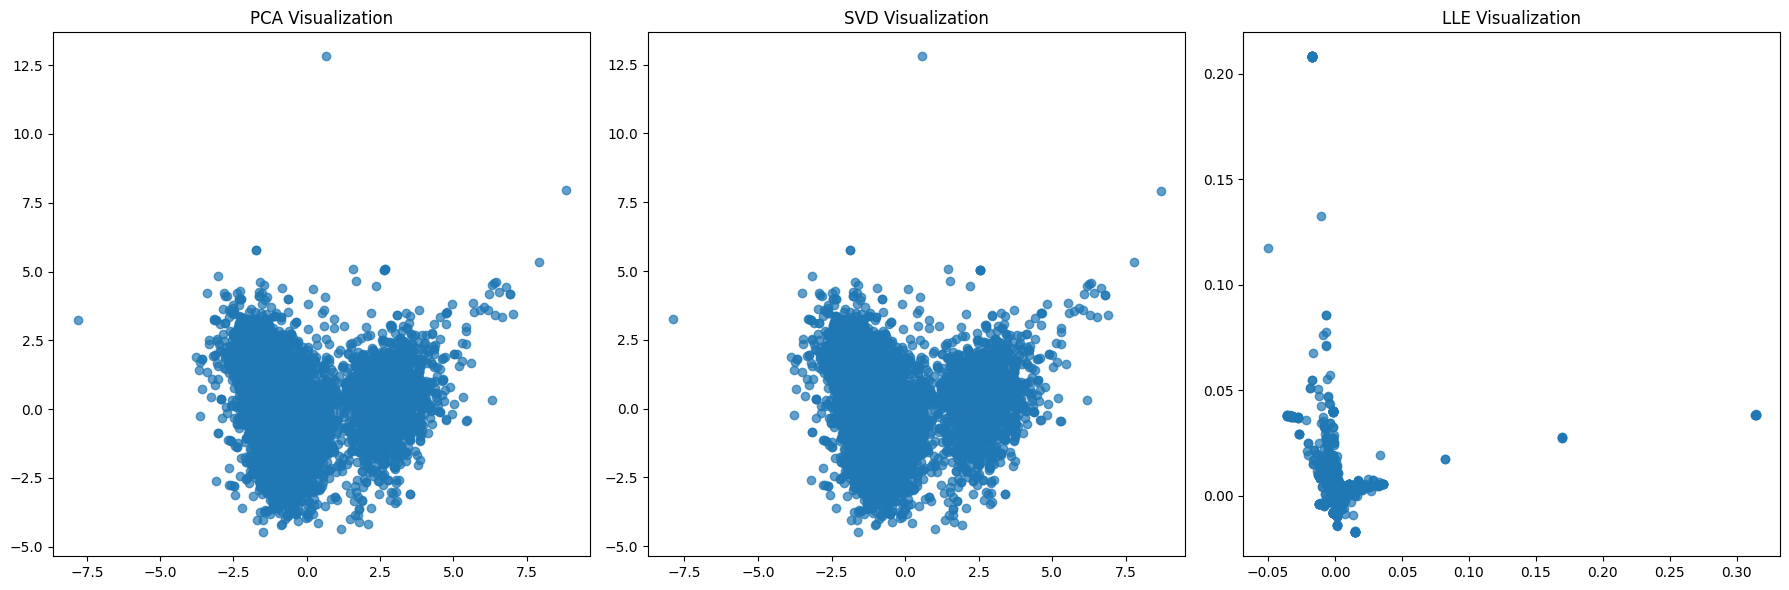

In [7]:

# Visualization for PCA, SVD, and LLE
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(wine_pca[:, 0], wine_pca[:, 1], alpha=0.7)
axs[0].set_title('PCA Visualization')

axs[1].scatter(wine_svd[:, 0], wine_svd[:, 1], alpha=0.7)
axs[1].set_title('SVD Visualization')

axs[2].scatter(wine_lle[:, 0], wine_lle[:, 1], alpha=0.7)
axs[2].set_title('LLE Visualization')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

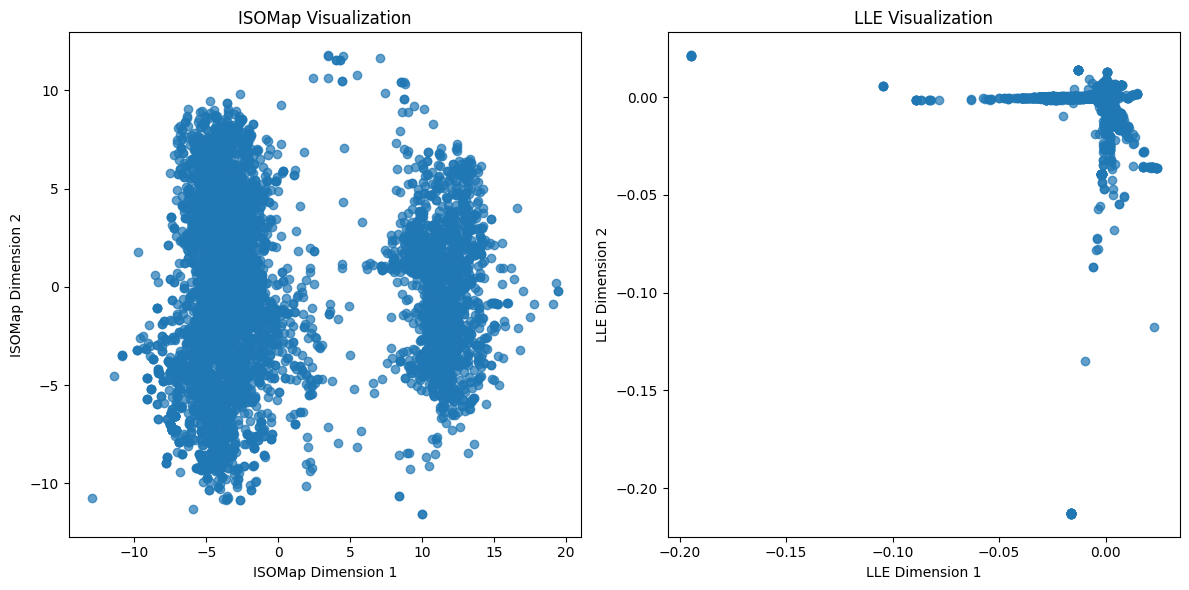

In [8]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding

# Applying ISOMap
isomap = Isomap(n_components=2)
wine_isomap = isomap.fit_transform(wine_data_preprocessed)

# Applying LLE
lle = LocallyLinearEmbedding(n_components=2)
wine_lle = lle.fit_transform(wine_data_preprocessed)

# Visualization for ISOMap and LLE
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# ISOMap Plot
axs[0].scatter(wine_isomap[:, 0], wine_isomap[:, 1], alpha=0.7)
axs[0].set_xlabel('ISOMap Dimension 1')
axs[0].set_ylabel('ISOMap Dimension 2')
axs[0].set_title('ISOMap Visualization')

# LLE Plot
axs[1].scatter(wine_lle[:, 0], wine_lle[:, 1], alpha=0.7)
axs[1].set_xlabel('LLE Dimension 1')
axs[1].set_ylabel('LLE Dimension 2')
axs[1].set_title('LLE Visualization')

plt.tight_layout()
plt.show()

In [9]:
!pip install umap-learn

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


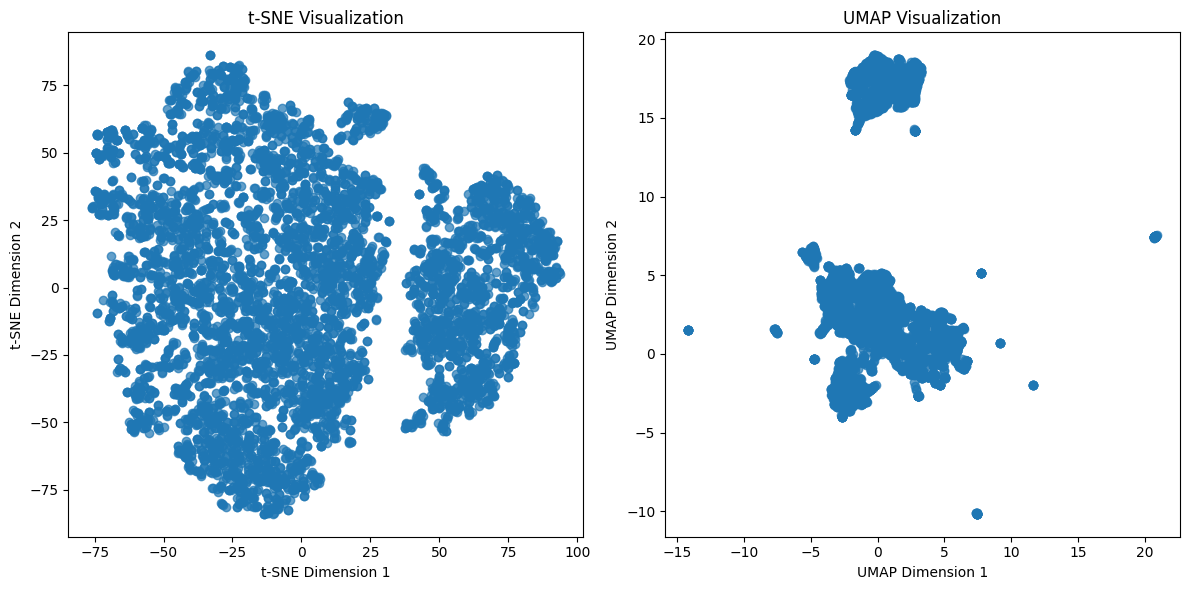

In [10]:
from sklearn.manifold import TSNE
import umap

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0)
wine_tsne = tsne.fit_transform(wine_data_preprocessed)

# Applying UMAP
umap_model = umap.UMAP(n_components=2, random_state=0)
wine_umap = umap_model.fit_transform(wine_data_preprocessed)

# Visualization for t-SNE and UMAP
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# t-SNE Plot
axs[0].scatter(wine_tsne[:, 0], wine_tsne[:, 1], alpha=0.7)
axs[0].set_xlabel('t-SNE Dimension 1')
axs[0].set_ylabel('t-SNE Dimension 2')
axs[0].set_title('t-SNE Visualization')

# UMAP Plot
axs[1].scatter(wine_umap[:, 0], wine_umap[:, 1], alpha=0.7)
axs[1].set_xlabel('UMAP Dimension 1')
axs[1].set_ylabel('UMAP Dimension 2')
axs[1].set_title('UMAP Visualization')

plt.tight_layout()
plt.show()



## UMAP Hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline


In [12]:
X_train, X_test = train_test_split(wine_data_preprocessed, test_size=0.3, random_state=42)


In [13]:
umap_pipeline = Pipeline([("umap", umap.UMAP(random_state=42))])


In [14]:
param_grid = {
    "umap__n_neighbors": [5, 15, 30, 50],
    "umap__min_dist": [0.0, 0.1, 0.5, 0.99],
    "umap__n_components": [2, 5, 10],
    # Add more parameters if needed
}


In [ ]:
from sklearn.metrics import make_scorer, silhouette_score

def silhouette_scorer(estimator, X):
    transformed_X = estimator.named_steps['umap'].transform(X)
    score = silhouette_score(transformed_X, labels)
    return score

# Define the scorer
silhouette_scorer = make_scorer(silhouette_scorer)

# GridSearchCV with the custom scorer
grid_search = GridSearchCV(estimator=umap_pipeline, param_grid=param_grid, scoring=silhouette_scorer, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# Evaluate on test set if necessary


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
# Visualization
import matplotlib.pyplot as plt
best_umap = grid_search.best_estimator_["umap"]
embedding = best_umap.transform(X_test)
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title("UMAP with Optimized Hyperparameters")
plt.show()


## Comparative Analysis of Dimensionality Reduction Techniques
In this section, we'll compare the results of the different dimensionality reduction techniques we applied to the wine dataset: PCA, SVD, MDS, LLE, and t-SNE. Since we faced challenges with MDS and ISOMap, and were unable to complete t-SNE, our focus will be on the techniques we successfully implemented.

1. PCA (Principal Component Analysis)
Pros: PCA is efficient and works well for linearly separable data. It's great for reducing dimensionality while preserving as much variance as possible.
Cons: PCA assumes that the principal components are linear combinations of the original features, so it may not capture complex relationships. Also, it doesn't preserve local relationships well.
2. SVD (Singular Value Decomposition)
Pros: SVD is useful for identifying the intrinsic geometric structure of the data. It's also efficient for sparse datasets.
Cons: Similar to PCA, SVD may not capture nonlinear relationships well and is sensitive to scaling.
3. LLE (Local Linear Embedding)
Pros: Excellent for uncovering nonlinear structures, particularly where data lie on a manifold. It maintains local distances well.
Cons: Can be sensitive to noise and the choice of neighbors. It may not scale well with dataset size and dimensionality.


### Discussion
1. Dataset Suitability: PCA and SVD are more suitable for datasets where linear relationships dominate. LLE is beneficial for datasets with nonlinear, manifold-like structures.
2. Efficiency: PCA and SVD are generally more efficient in terms of computational resources compared to LLE, which can be intensive for large datasets.
3. Use Cases: PCA and SVD are more versatile and can be used in a wide range of applications. LLE is specifically useful for tasks that benefit from understanding local structures and manifolds, such as image recognition and signal processing.

## Conclusion

This notebook demonstrates the application of different dimensionality reduction techniques on the wine quality dataset. Each technique has its strengths and is suitable for different types of data and analysis requirements.